* interval -> ms

# Import Libraries

In [104]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

# POLO

### A

In [105]:
polo_a = pd.read_csv("./data/A/POLO_A_2025-01-31T17_59_47.140697Z-debug.csv")

polo_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345800735,speed,0.0,335,1,1,0
1,1738345801078,rpm,983.0,140,2,2,0
2,1738345801218,engine_load,13.0,152,3,3,0
3,1738345801370,engine_oil_temperature,NO DATA\r>,116,4,4,1
4,1738345801486,coolant_temp,87.0,90,5,5,1


In [106]:
polo_a["Timestamp"].diff().mean()

np.float64(144.75895282785874)

In [107]:
polo_a["Timestamp"].diff().median()

np.float64(149.0)

In [108]:
polo_a.groupby("CommandSent")["Interval"].mean()

CommandSent
absolute_barometric_pressure        147.940000
absolute_load_value                 137.906667
absolute_throttle_pos_B             141.320000
accelerator_pedal_pos_D             145.606667
accelerator_pedal_pos_E             143.440000
air_fuel_ratio                      145.213333
catalyst_temp_bank1_sensor1         145.466667
coolant_temp                        140.933333
distance_traveled_with_MIL_on       144.653333
engine_fuel_rate                    137.060000
engine_load                         147.266667
engine_oil_temperature              141.953333
ethanol_percentage                  143.020000
fuel_level                          143.786667
fuel_pressure                       140.733333
fuel_rail_gauge_pressure            142.193333
fuel_rail_pressure                  139.126667
intake_air_temperature              143.340000
intake_manifold_absolut_pressure    147.833333
mass_air_flow                       146.320000
relative_throttle_pos               143.280000
r

In [109]:
polo_a.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        148.0
absolute_load_value                 148.0
absolute_throttle_pos_B             149.0
accelerator_pedal_pos_D             149.0
accelerator_pedal_pos_E             148.0
air_fuel_ratio                      149.0
catalyst_temp_bank1_sensor1         150.0
coolant_temp                        148.0
distance_traveled_with_MIL_on       149.0
engine_fuel_rate                    147.0
engine_load                         148.0
engine_oil_temperature              148.5
ethanol_percentage                  149.0
fuel_level                          148.0
fuel_pressure                       148.0
fuel_rail_gauge_pressure            148.0
fuel_rail_pressure                  149.0
intake_air_temperature              149.0
intake_manifold_absolut_pressure    149.0
mass_air_flow                       149.0
relative_throttle_pos               148.0
rpm                                 148.0
runtime_since_engine_start          148.0
speed                 

### B

In [110]:
polo_b = pd.read_csv("./data/B/POLO_B_2025-01-31T17_48_22.461519Z-debug.csv")

polo_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345088711,speed,0.0,309,1,1,0
1,1738345088711,speed,0.0,323,1,2,0
2,1738345089034,rpm,981.0,162,2,4,0
3,1738345089034,rpm,981.0,169,2,5,0
4,1738345089240,engine_load,16.0,185,3,7,0


In [111]:
polo_b["Timestamp"].diff().mean()

np.float64(136.15826859045504)

In [112]:
polo_b["Timestamp"].diff().median()

np.float64(176.0)

In [168]:
groupby_polo_b = polo_b.groupby("CommandSent")["Interval"].mean().sort_values()

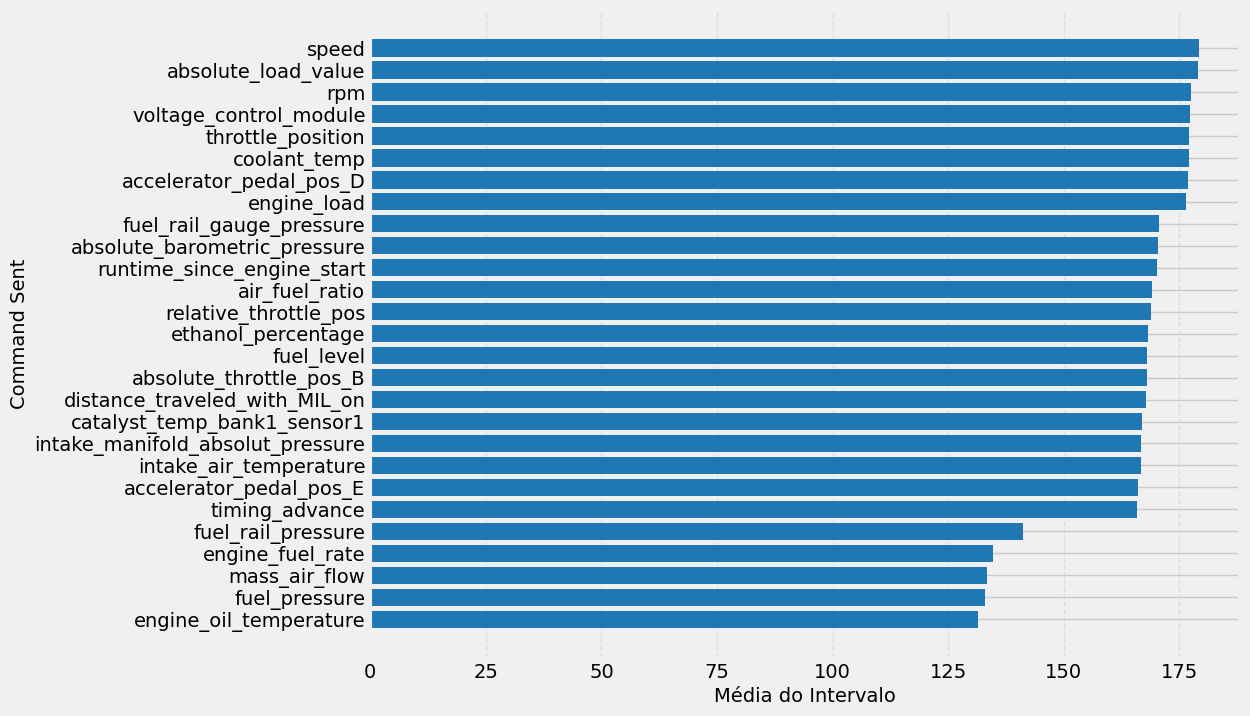

In [174]:
plt.figure(figsize=(10, 8))

# Criar o gráfico de barras horizontais
plt.barh(groupby_polo_b.index, groupby_polo_b.values, color="#1f77b4")

# Adicionar rótulos e título
plt.xlabel("Média do Intervalo", fontsize=14)
plt.ylabel("Command Sent", fontsize=14)

# Adicionar grade no eixo X para referência
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Exibir o gráfico
plt.show()

In [114]:
polo_b.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        177.0
absolute_load_value                 181.0
absolute_throttle_pos_B             176.0
accelerator_pedal_pos_D             180.0
accelerator_pedal_pos_E             175.0
air_fuel_ratio                      177.0
catalyst_temp_bank1_sensor1         175.0
coolant_temp                        181.0
distance_traveled_with_MIL_on       177.0
engine_fuel_rate                    133.0
engine_load                         177.0
engine_oil_temperature              131.0
ethanol_percentage                  176.0
fuel_level                          177.0
fuel_pressure                       133.0
fuel_rail_gauge_pressure            178.0
fuel_rail_pressure                  134.5
intake_air_temperature              177.0
intake_manifold_absolut_pressure    177.0
mass_air_flow                       134.0
relative_throttle_pos               177.0
rpm                                 179.0
runtime_since_engine_start          177.0
speed                 

### Plotting

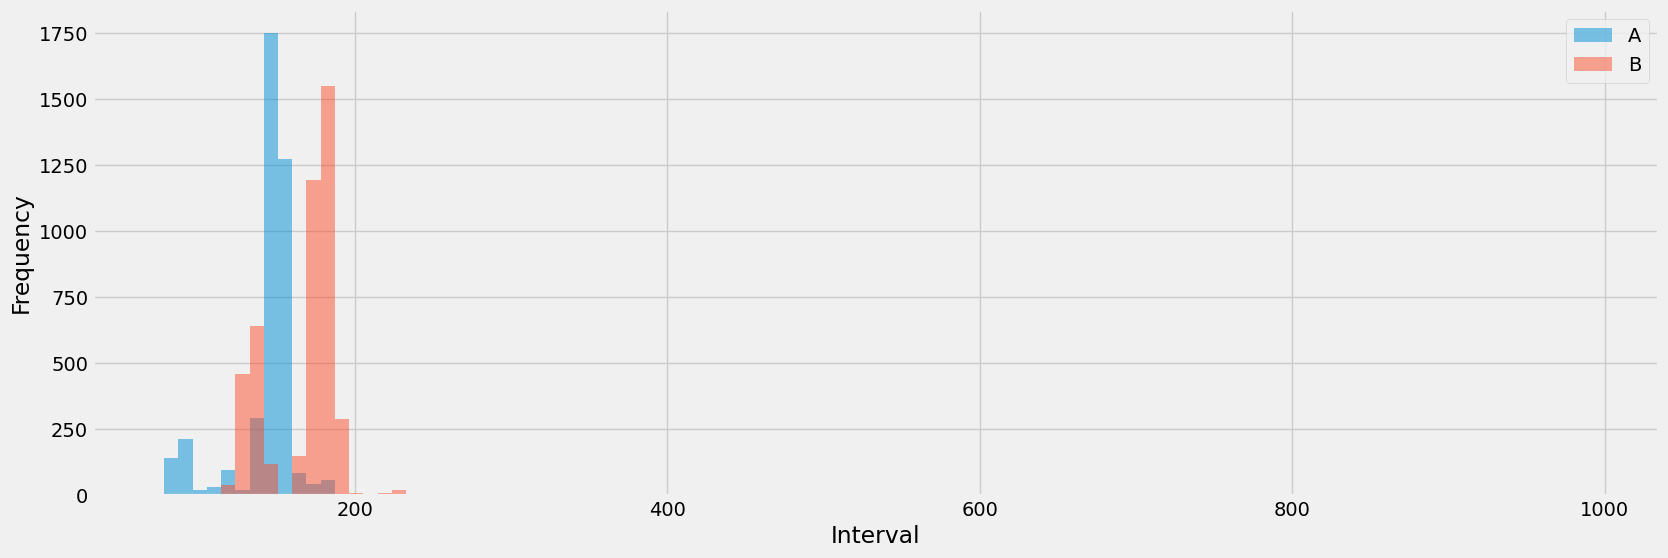

In [115]:
min_value = min(polo_a["Interval"].min(), polo_b["Interval"].min())
max_value = max(polo_a["Interval"].max(), polo_b["Interval"].max())

num_bins = 100
bins = np.linspace(min_value, max_value, num_bins + 1)

plt.figure(figsize=(18, 6))

plt.hist(polo_a["Interval"], bins=bins, alpha=0.5, label="A")
plt.hist(polo_b["Interval"], bins=bins, alpha=0.5, label="B")

plt.xlabel("Interval")
plt.ylabel("Frequency")

plt.legend(loc='upper right')

plt.show()


In [116]:
polo_a_intervals = polo_a["Interval"].dropna().values
polo_b_intervals = polo_b["Interval"].dropna().values

In [117]:
t_stat, t_p_value = stats.ttest_ind(polo_a_intervals, polo_b_intervals, equal_var=False)
print(f"T-test: Statistic = {t_stat}, p-value = {t_p_value:.4f}")

T-test: Statistic = -45.08184923781335, p-value = 0.0000


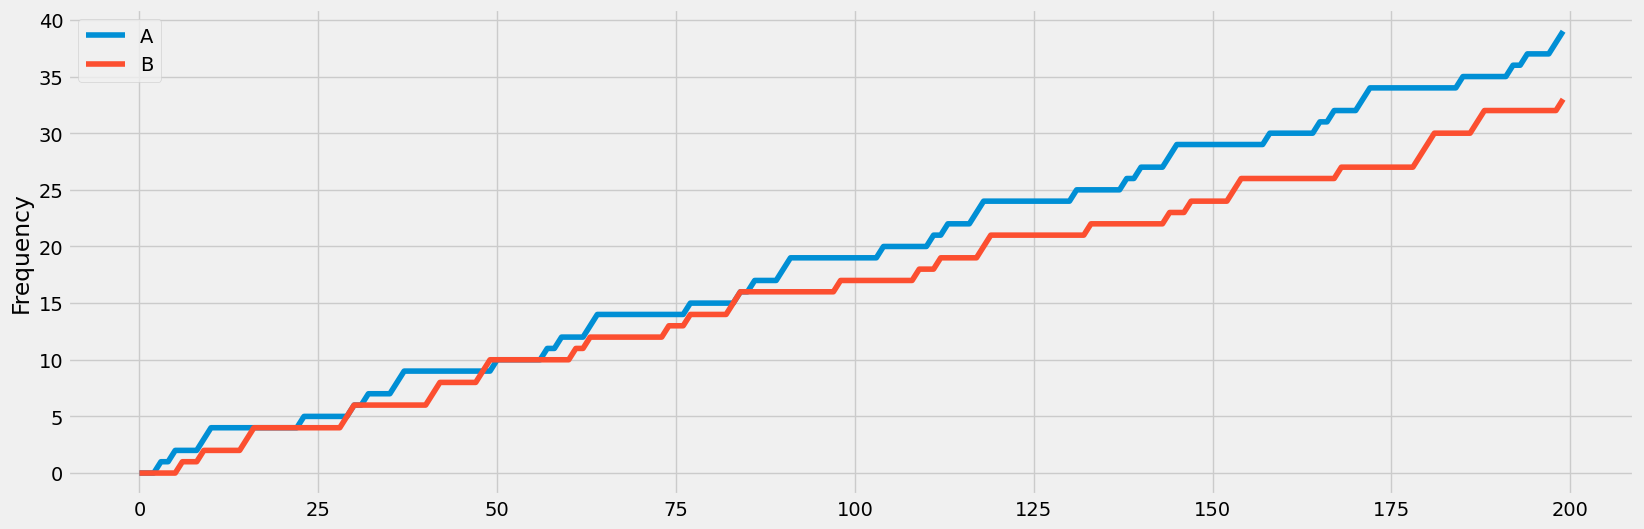

In [ ]:
plt.figure(figsize=(18, 6))

polo_a["Failed"].iloc[:200].plot(label="A")
polo_b["Failed"].iloc[:200].plot(label="B")

plt.xlabel("")
plt.ylabel("Frequency")

plt.legend(loc='upper left')

plt.show()

# FIT

### A

In [118]:
fit_a = pd.read_csv("./data/A/FIT_A_2025-01-31T17_48_23.509583Z-debug.csv")

fit_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345053621,speed,0.0,453,1,1,0
1,1738345054075,rpm,738.0,148,2,2,0
2,1738345054223,engine_load,22.0,151,3,3,0
3,1738345054375,engine_oil_temperature,NO DATA\r>,117,4,4,1
4,1738345054492,coolant_temp,81.0,90,5,5,1


In [119]:
fit_a["Timestamp"].diff().mean()

np.float64(147.36025408348456)

In [120]:
fit_a["Timestamp"].diff().median()

np.float64(150.0)

In [121]:
fit_a.groupby("CommandSent")["Interval"].mean()

CommandSent
absolute_barometric_pressure        151.000000
absolute_load_value                 134.907975
absolute_throttle_pos_B             150.926380
accelerator_pedal_pos_D             150.766871
accelerator_pedal_pos_E             151.460123
air_fuel_ratio                      151.165644
catalyst_temp_bank1_sensor1         151.128834
coolant_temp                        135.073171
distance_traveled_with_MIL_on       152.435583
engine_fuel_rate                    142.000000
engine_load                         150.146341
engine_oil_temperature              140.134146
ethanol_percentage                  142.098160
fuel_level                          151.355828
fuel_pressure                       141.184049
fuel_rail_gauge_pressure            144.907975
fuel_rail_pressure                  131.895706
intake_air_temperature              150.527607
intake_manifold_absolut_pressure    148.361963
mass_air_flow                       151.335366
relative_throttle_pos               135.374233
r

In [122]:
fit_a.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        150.0
absolute_load_value                 149.0
absolute_throttle_pos_B             150.0
accelerator_pedal_pos_D             150.0
accelerator_pedal_pos_E             149.0
air_fuel_ratio                      150.0
catalyst_temp_bank1_sensor1         150.0
coolant_temp                        149.0
distance_traveled_with_MIL_on       150.0
engine_fuel_rate                    149.0
engine_load                         149.0
engine_oil_temperature              147.0
ethanol_percentage                  149.0
fuel_level                          150.0
fuel_pressure                       148.0
fuel_rail_gauge_pressure            149.0
fuel_rail_pressure                  149.0
intake_air_temperature              149.0
intake_manifold_absolut_pressure    149.0
mass_air_flow                       150.0
relative_throttle_pos               148.0
rpm                                 148.0
runtime_since_engine_start          149.0
speed                 

### B

In [123]:
fit_b = pd.read_csv("./data/B/FIT_B_2025-01-31T18_00_37.690262Z-debug.csv")

fit_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345789191,speed,0.0,152,1,1,0
1,1738345789374,rpm,762.0,119,2,3,0
2,1738345789523,engine_load,20.0,121,3,5,0
3,1738345789674,engine_oil_temperature,NO DATA,123,4,7,1
4,1738345789800,coolant_temp,88.0,110,5,9,1


In [124]:
fit_b["Timestamp"].diff().mean()

np.float64(145.73830935251797)

In [125]:
fit_b["Timestamp"].diff().median()

np.float64(149.0)

In [126]:
fit_b.groupby("CommandSent")["Interval"].mean()

CommandSent
absolute_barometric_pressure        123.378049
absolute_load_value                 121.798780
absolute_throttle_pos_B             123.871951
accelerator_pedal_pos_D             123.660606
accelerator_pedal_pos_E             122.896970
air_fuel_ratio                      123.201220
catalyst_temp_bank1_sensor1         123.042683
coolant_temp                        122.151515
distance_traveled_with_MIL_on       123.345455
engine_fuel_rate                    123.097561
engine_load                         124.103030
engine_oil_temperature              123.866667
ethanol_percentage                  123.339394
fuel_level                          122.763636
fuel_pressure                       122.915152
fuel_rail_gauge_pressure            120.490909
fuel_rail_pressure                  120.763636
intake_air_temperature              123.818182
intake_manifold_absolut_pressure    120.812121
mass_air_flow                       123.854545
relative_throttle_pos               121.903030
r

In [127]:
fit_b.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        122.0
absolute_load_value                 119.0
absolute_throttle_pos_B             121.0
accelerator_pedal_pos_D             122.0
accelerator_pedal_pos_E             121.0
air_fuel_ratio                      121.0
catalyst_temp_bank1_sensor1         121.0
coolant_temp                        119.0
distance_traveled_with_MIL_on       121.0
engine_fuel_rate                    122.0
engine_load                         122.0
engine_oil_temperature              122.0
ethanol_percentage                  122.0
fuel_level                          121.0
fuel_pressure                       121.0
fuel_rail_gauge_pressure            119.0
fuel_rail_pressure                  119.0
intake_air_temperature              121.0
intake_manifold_absolut_pressure    119.0
mass_air_flow                       121.0
relative_throttle_pos               119.0
rpm                                 121.0
runtime_since_engine_start          121.0
speed                 

### Plotting

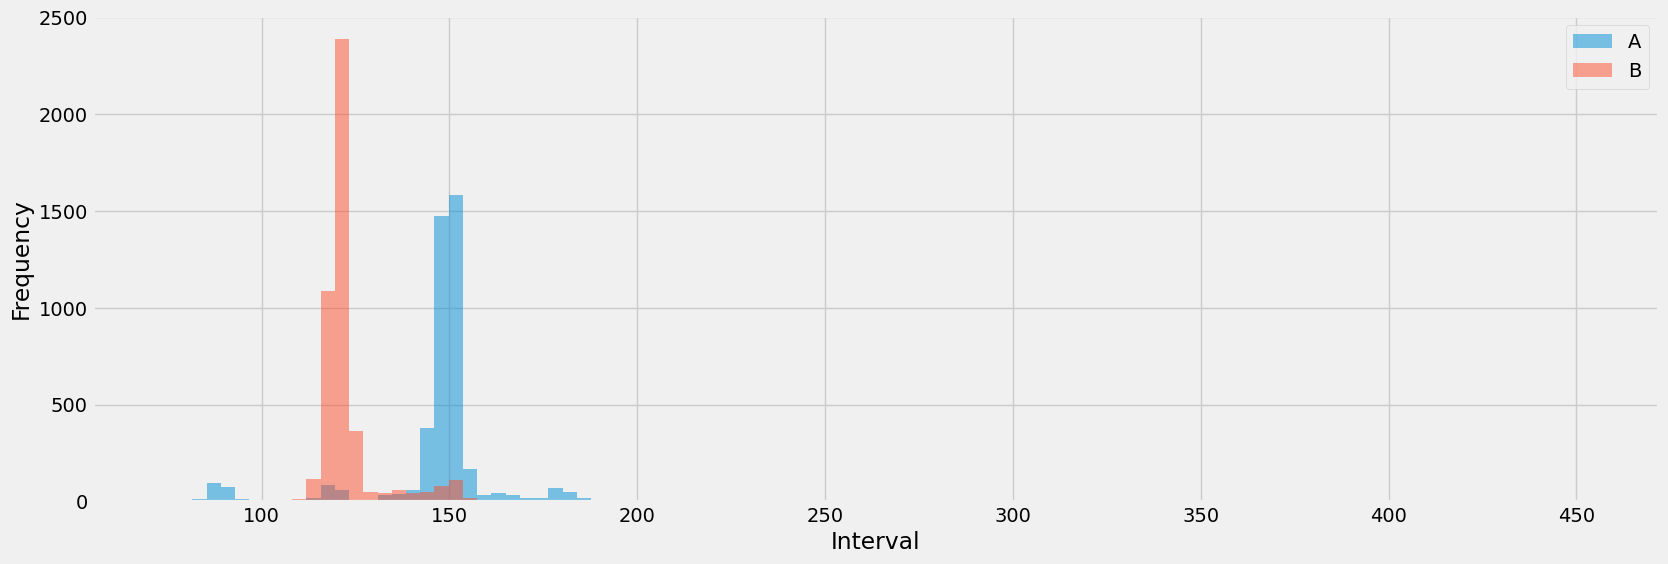

In [128]:
min_value = min(fit_a["Interval"].min(), fit_b["Interval"].min())
max_value = max(fit_a["Interval"].max(), fit_b["Interval"].max())

num_bins = 100
bins = np.linspace(min_value, max_value, num_bins + 1)

plt.figure(figsize=(18, 6))

plt.hist(fit_a["Interval"], bins=bins, alpha=0.5, label="A")
plt.hist(fit_b["Interval"], bins=bins, alpha=0.5, label="B")

plt.xlabel("Interval")
plt.ylabel("Frequency")

plt.legend(loc='upper right')

plt.show()

In [129]:
fit_a_intervals = fit_a["Interval"].dropna().values
fit_b_intervals = fit_b["Interval"].dropna().values

In [130]:
t_stat, t_p_value = stats.ttest_ind(fit_a_intervals, fit_b_intervals, equal_var=False)
print(f"T-test: Statistic = {t_stat}, p-value = {t_p_value:.4f}")

T-test: Statistic = 86.33193884672912, p-value = 0.0000


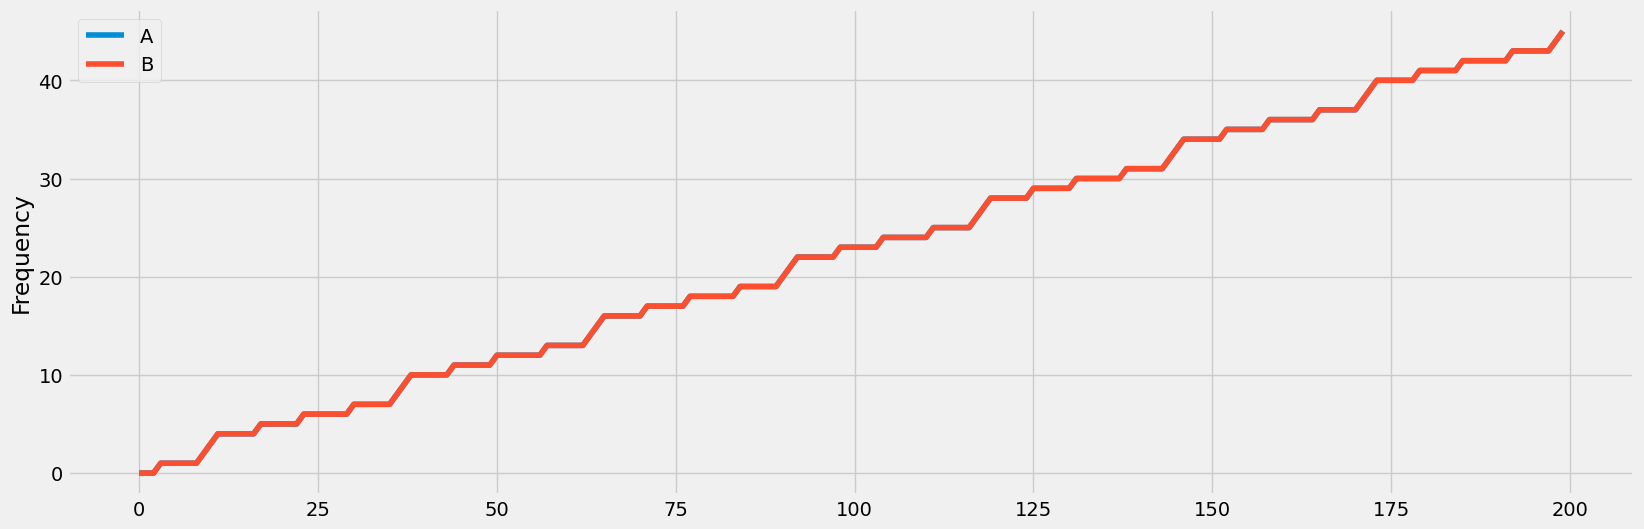

In [162]:
plt.figure(figsize=(18, 6))

fit_a["Failed"].iloc[:200].plot(label="A")
fit_b["Failed"].iloc[:200].plot(label="B")

plt.xlabel("")
plt.ylabel("Frequency")

plt.legend(loc='upper left')

plt.show()

# FASTBACK

### A

In [131]:
fastback_a = pd.read_csv("./data/A/FASTBACK_A_2025-01-31T18_25_37.743808Z-debug.csv")

fastback_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738347324917,speed,0.0,280,1,1,0
1,1738347325197,rpm,941.0,156,2,2,0
2,1738347325353,engine_load,40.0,143,3,3,0
3,1738347325497,engine_oil_temperature,127.0,150,4,4,0
4,1738347325647,coolant_temp,82.0,151,5,5,0


In [132]:
fastback_a["Timestamp"].diff().mean()

np.float64(144.62644628099173)

In [133]:
fastback_a["Timestamp"].diff().median()

np.float64(150.0)

In [134]:
fastback_a.groupby("CommandSent")["Interval"].mean()

CommandSent
absolute_barometric_pressure        145.051282
absolute_load_value                 142.314103
absolute_throttle_pos_B             143.987261
accelerator_pedal_pos_D             143.866242
accelerator_pedal_pos_E             142.337580
air_fuel_ratio                      145.320513
catalyst_temp_bank1_sensor1         144.738854
coolant_temp                        142.681529
distance_traveled_with_MIL_on       144.509554
engine_fuel_rate                    141.579618
engine_load                         144.089172
engine_oil_temperature              142.917197
ethanol_percentage                  143.566879
fuel_level                          146.910828
fuel_pressure                       144.630573
fuel_rail_gauge_pressure            143.764331
fuel_rail_pressure                  142.031847
intake_air_temperature              143.726115
intake_manifold_absolut_pressure    141.146497
mass_air_flow                       143.509554
relative_throttle_pos               146.802548
r

In [135]:
fastback_a.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        149.0
absolute_load_value                 149.0
absolute_throttle_pos_B             149.0
accelerator_pedal_pos_D             149.0
accelerator_pedal_pos_E             149.0
air_fuel_ratio                      149.0
catalyst_temp_bank1_sensor1         149.0
coolant_temp                        149.0
distance_traveled_with_MIL_on       149.0
engine_fuel_rate                    148.0
engine_load                         149.0
engine_oil_temperature              149.0
ethanol_percentage                  149.0
fuel_level                          149.0
fuel_pressure                       149.0
fuel_rail_gauge_pressure            149.0
fuel_rail_pressure                  149.0
intake_air_temperature              149.0
intake_manifold_absolut_pressure    149.0
mass_air_flow                       148.0
relative_throttle_pos               149.0
rpm                                 148.0
runtime_since_engine_start          149.0
speed                 

### B

In [136]:
fastback_b = pd.read_csv("./data/B/FASTBACK_B_2025-01-31T18_13_34.480439Z-debug.csv")

fastback_b = fastback_b.iloc[::2].reset_index(drop=True)

fastback_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738346625814,speed,0.0,173,1,1,0
1,1738346626015,rpm,1008.0,153,2,4,0
2,1738346626195,engine_load,47.0,154,3,7,0
3,1738346626375,engine_oil_temperature,96.0,153,4,10,0
4,1738346626530,coolant_temp,53.0,148,5,13,0


In [137]:
fastback_a["Timestamp"].diff().mean()

np.float64(144.62644628099173)

In [138]:
fastback_a["Timestamp"].diff().median()

np.float64(150.0)

In [139]:
fastback_b.groupby("CommandSent")["Interval"].mean()

CommandSent
absolute_barometric_pressure        140.185714
absolute_load_value                 137.457143
absolute_throttle_pos_B             139.557143
accelerator_pedal_pos_D             136.057143
accelerator_pedal_pos_E             139.957746
air_fuel_ratio                      140.814286
catalyst_temp_bank1_sensor1         136.414286
coolant_temp                        148.482270
distance_traveled_with_MIL_on       149.567376
engine_fuel_rate                    138.100000
engine_load                         149.758865
engine_oil_temperature              138.521127
ethanol_percentage                  137.100000
fuel_level                          137.642857
fuel_pressure                       121.563380
fuel_rail_gauge_pressure            118.647887
fuel_rail_pressure                  120.271429
intake_air_temperature              138.774648
intake_manifold_absolut_pressure    137.971429
mass_air_flow                       121.414286
relative_throttle_pos               140.816901
r

In [140]:
fastback_b.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        146.0
absolute_load_value                 145.5
absolute_throttle_pos_B             147.0
accelerator_pedal_pos_D             142.0
accelerator_pedal_pos_E             147.0
air_fuel_ratio                      147.0
catalyst_temp_bank1_sensor1         145.0
coolant_temp                        150.0
distance_traveled_with_MIL_on       150.0
engine_fuel_rate                    146.0
engine_load                         153.0
engine_oil_temperature              148.0
ethanol_percentage                  146.0
fuel_level                          149.0
fuel_pressure                       119.0
fuel_rail_gauge_pressure            118.0
fuel_rail_pressure                  119.0
intake_air_temperature              148.0
intake_manifold_absolut_pressure    147.0
mass_air_flow                       121.0
relative_throttle_pos               146.0
rpm                                 152.0
runtime_since_engine_start          146.0
speed                 

### Plotting

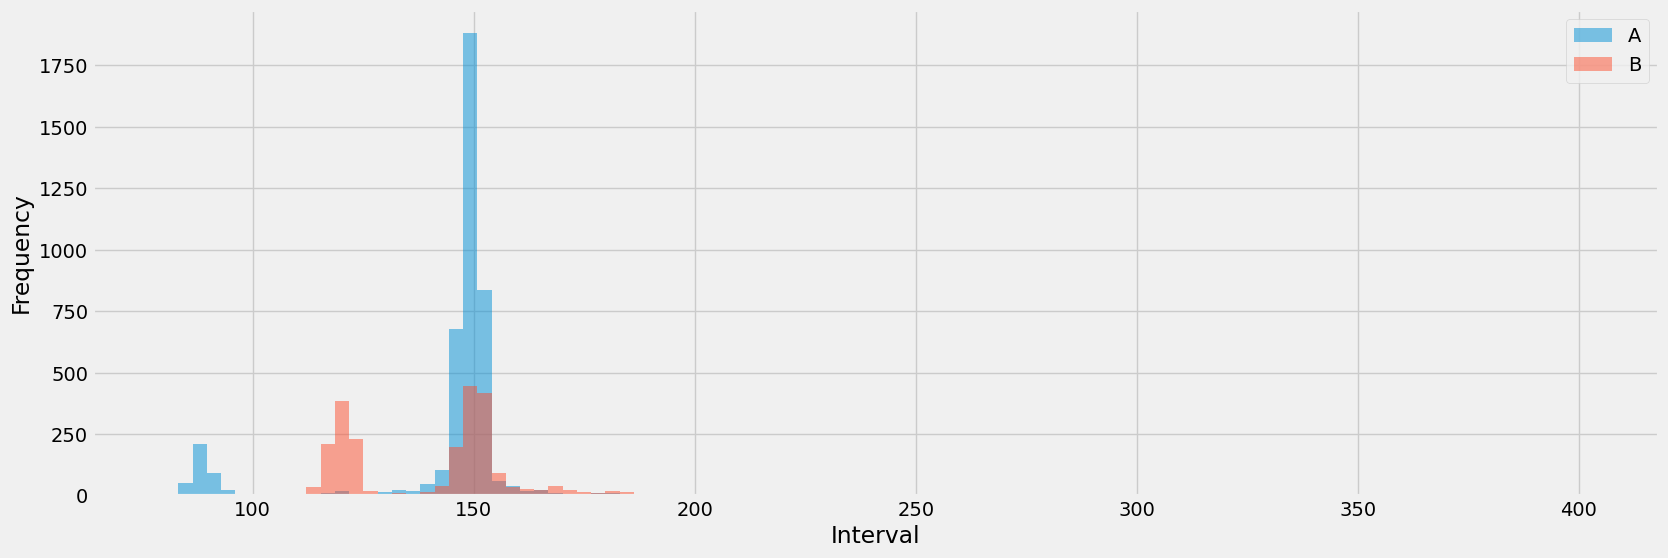

In [83]:
min_value = min(fastback_a["Interval"].min(), fastback_b["Interval"].min())
max_value = max(fastback_a["Interval"].max(), fastback_b["Interval"].max())

num_bins = 100
bins = np.linspace(min_value, max_value, num_bins + 1)

plt.figure(figsize=(18, 6))

plt.hist(fastback_a["Interval"], bins=bins, alpha=0.5, label="A")
plt.hist(fastback_b["Interval"], bins=bins, alpha=0.5, label="B")

plt.xlabel("Interval")
plt.ylabel("Frequency")

plt.legend(loc='upper right')

plt.show()

In [81]:
fastback_a_intervals = fastback_a["Interval"].dropna().values
fastback_b_intervals = fastback_b["Interval"].dropna().values

In [82]:
t_stat, t_p_value = stats.ttest_ind(fastback_a_intervals, fastback_b_intervals, equal_var=False)
print(f"T-test: Statistic = {t_stat}, p-value = {t_p_value:.4f}")

T-test: Statistic = 7.407115831617308, p-value = 0.0000


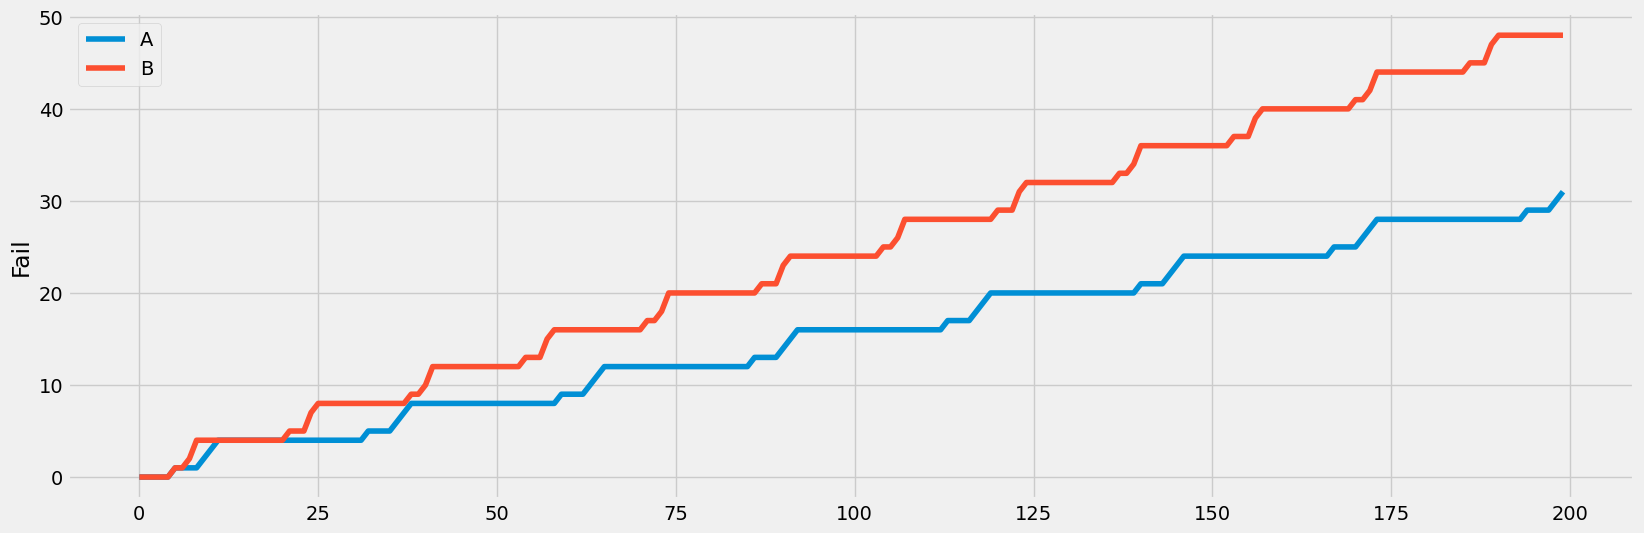

In [164]:
plt.figure(figsize=(18, 6))

fastback_a["Failed"].iloc[:200].plot(label="A")
fastback_b["Failed"].iloc[:200].plot(label="B")

plt.xlabel("")
plt.ylabel("Fail")

plt.legend(loc='upper left')

plt.show()

# TCROSS

### A

In [84]:
tcross_a = pd.read_csv("./data/A/TCROSS_A_2025-01-31T18_13_48.052103Z-debug.csv")

tcross_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738346588337,fuel_pressure,NO DATA\r>,492,200,199,45
1,1738346588829,fuel_rail_pressure,NO DATA\r>,151,201,200,46
2,1738346588980,fuel_rail_gauge_pressure,NO DATA\r>,150,202,201,47
3,1738346589130,intake_manifold_absolut_pressure,65.0,149,203,202,47
4,1738346589279,timing_advance,-9.0,151,204,203,47


In [141]:
tcross_a["Timestamp"].diff().mean()

np.float64(147.87445086705202)

In [142]:
tcross_a["Timestamp"].diff().median()

np.float64(150.0)

In [143]:
tcross_a.groupby("CommandSent")["Interval"].mean()

CommandSent
absolute_barometric_pressure        146.500000
absolute_load_value                 146.956250
absolute_throttle_pos_B             145.856250
accelerator_pedal_pos_D             146.093750
accelerator_pedal_pos_E             146.212500
air_fuel_ratio                      145.456250
catalyst_temp_bank1_sensor1         146.181250
coolant_temp                        149.431250
distance_traveled_with_MIL_on       148.968750
engine_fuel_rate                    142.975000
engine_load                         149.012500
engine_oil_temperature              142.350000
ethanol_percentage                  148.456250
fuel_level                          147.450000
fuel_pressure                       149.888199
fuel_rail_gauge_pressure            144.118012
fuel_rail_pressure                  146.826087
intake_air_temperature              150.812500
intake_manifold_absolut_pressure    149.111801
mass_air_flow                       148.231250
relative_throttle_pos               145.575000
r

In [85]:
tcross_a.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        150.0
absolute_load_value                 149.5
absolute_throttle_pos_B             150.0
accelerator_pedal_pos_D             150.0
accelerator_pedal_pos_E             149.0
air_fuel_ratio                      149.0
catalyst_temp_bank1_sensor1         149.0
coolant_temp                        150.0
distance_traveled_with_MIL_on       149.0
engine_fuel_rate                    149.0
engine_load                         149.0
engine_oil_temperature              148.0
ethanol_percentage                  149.0
fuel_level                          149.0
fuel_pressure                       149.0
fuel_rail_gauge_pressure            149.0
fuel_rail_pressure                  150.0
intake_air_temperature              149.0
intake_manifold_absolut_pressure    150.0
mass_air_flow                       150.0
relative_throttle_pos               149.0
rpm                                 148.0
runtime_since_engine_start          149.0
speed                 

### B

In [86]:
tcross_b = pd.read_csv("./data/B/TCROSS_B_2025-01-31T18_25_15.916263Z-debug.csv")

tcross_b = tcross_b.iloc[::2].reset_index(drop=True)

tcross_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738347287369,speed,0.0,206,1,1,0
1,1738347287620,rpm,982.0,180,2,4,0
2,1738347287801,engine_load,15.0,180,3,7,0
3,1738347288025,engine_oil_temperature,NO DATA,134,4,10,1
4,1738347288160,coolant_temp,85.0,184,5,13,1


In [92]:
tcross_b["Timestamp"].diff().mean()

np.float64(285.7975432211101)

In [93]:
tcross_b["Timestamp"].diff().median()

np.float64(309.0)

In [94]:
tcross_b.groupby("CommandSent")["Interval"].mean()

CommandSent
absolute_barometric_pressure        176.500000
absolute_load_value                 181.784000
absolute_throttle_pos_B             172.532258
accelerator_pedal_pos_D             180.800000
accelerator_pedal_pos_E             176.158730
air_fuel_ratio                      174.793651
catalyst_temp_bank1_sensor1         188.206349
coolant_temp                        181.190476
distance_traveled_with_MIL_on       181.682540
engine_fuel_rate                    139.177419
engine_load                         186.571429
engine_oil_temperature              138.718750
ethanol_percentage                  176.031746
fuel_level                          173.079365
fuel_pressure                       140.619048
fuel_rail_gauge_pressure            145.698413
fuel_rail_pressure                  139.269841
intake_air_temperature              176.841270
intake_manifold_absolut_pressure    177.047619
mass_air_flow                       143.822581
relative_throttle_pos               171.952381
r

In [87]:
tcross_b.groupby("CommandSent")["Interval"].median()

CommandSent
absolute_barometric_pressure        178.5
absolute_load_value                 180.0
absolute_throttle_pos_B             178.0
accelerator_pedal_pos_D             180.0
accelerator_pedal_pos_E             179.0
air_fuel_ratio                      179.0
catalyst_temp_bank1_sensor1         178.0
coolant_temp                        180.0
distance_traveled_with_MIL_on       178.0
engine_fuel_rate                    134.0
engine_load                         179.0
engine_oil_temperature              133.5
ethanol_percentage                  178.0
fuel_level                          178.0
fuel_pressure                       135.0
fuel_rail_gauge_pressure            135.0
fuel_rail_pressure                  134.0
intake_air_temperature              178.0
intake_manifold_absolut_pressure    179.0
mass_air_flow                       135.0
relative_throttle_pos               178.0
rpm                                 180.0
runtime_since_engine_start          177.0
speed                 

### Plotting

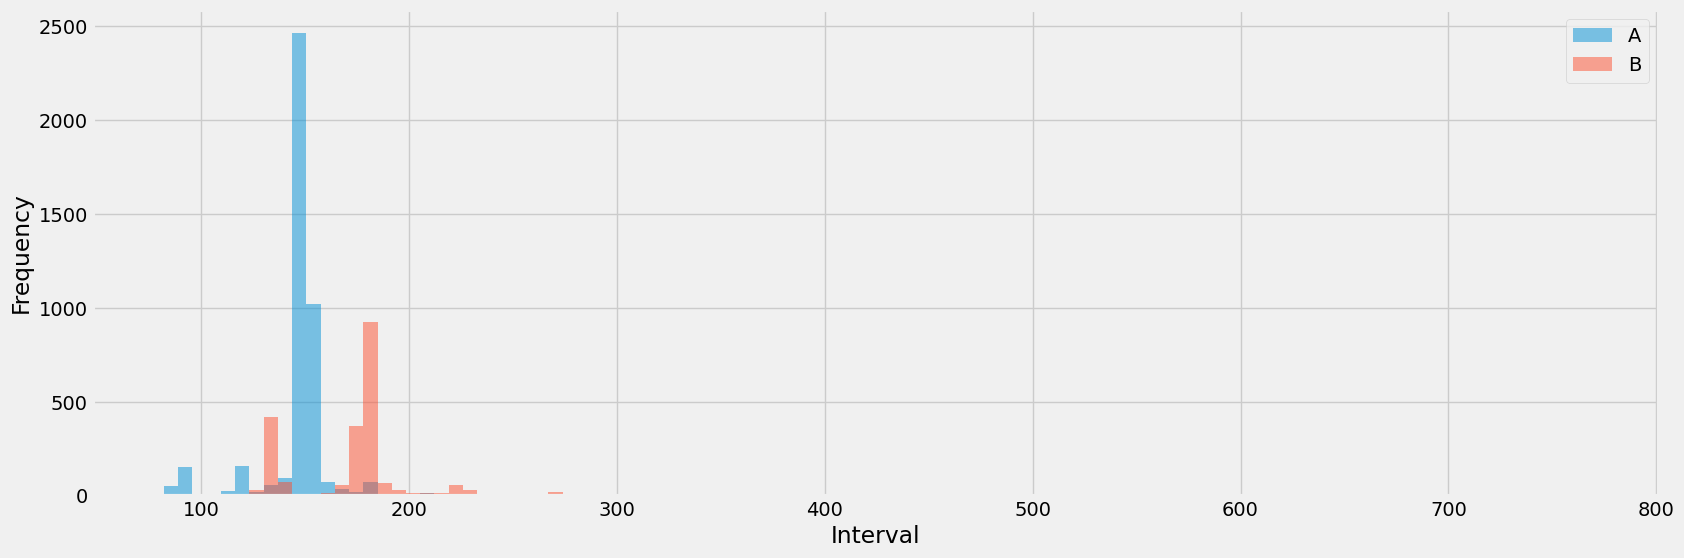

In [90]:
min_value = min(tcross_a["Interval"].min(), tcross_b["Interval"].min())
max_value = max(tcross_a["Interval"].max(), tcross_b["Interval"].max())

num_bins = 100
bins = np.linspace(min_value, max_value, num_bins + 1)

plt.figure(figsize=(18, 6))

plt.hist(tcross_a["Interval"], bins=bins, alpha=0.5, label="A")
plt.hist(tcross_b["Interval"], bins=bins, alpha=0.5, label="B")

plt.xlabel("Interval")
plt.ylabel("Frequency")

plt.legend(loc='upper right')

plt.show()

In [88]:
tcross_a_intervals = tcross_a["Interval"].dropna().values
tcross_b_intervals = tcross_b["Interval"].dropna().values

In [89]:
t_stat, t_p_value = stats.ttest_ind(tcross_a_intervals, tcross_b_intervals, equal_var=False)
print(f"T-test: Statistic = {t_stat}, p-value = {t_p_value:.4f}")

T-test: Statistic = -32.22883307550099, p-value = 0.0000


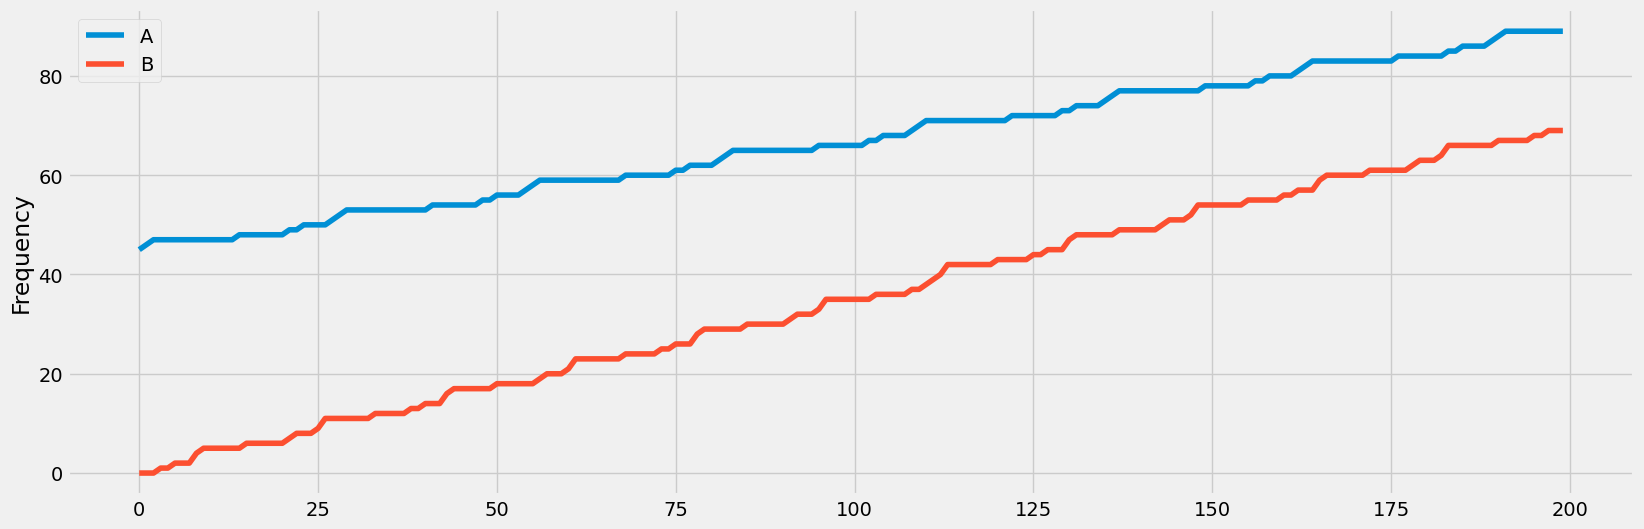

In [165]:
plt.figure(figsize=(18, 6))

tcross_a["Failed"].iloc[:200].plot(label="A")
tcross_b["Failed"].iloc[:200].plot(label="B")

plt.xlabel("")
plt.ylabel("Frequency")

plt.legend(loc='upper left')

plt.show()

# Statistics